In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
train = pd.read_excel('https://github.com/rsdevanathan/Customer_Subscription/blob/main/train_file.xlsx?raw=true')

In [ ]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no


### Sanity Checks

In [ ]:
print("Actual Shape:",train.shape)
train = train.drop_duplicates()
print("Distinct Shape:",train.shape)

Actual Shape: (32910, 15)
Distinct Shape: (32902, 15)


In [ ]:
train.isna().sum(axis = 0)

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
dtype: int64

## Target Variable

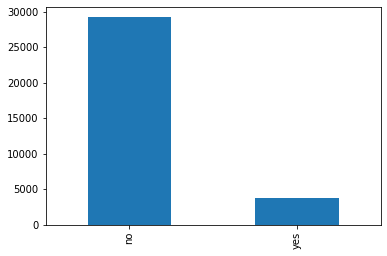

In [ ]:
train['y'].value_counts()
train['y'].value_counts().plot(kind='bar');

In [ ]:
train = train.replace({'y': {'yes': 1, 
                                'no': 0}})


## Numerical Features

### Age

In [ ]:
train['age'].describe()

count    32902.000000
mean        40.012796
std         10.402346
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

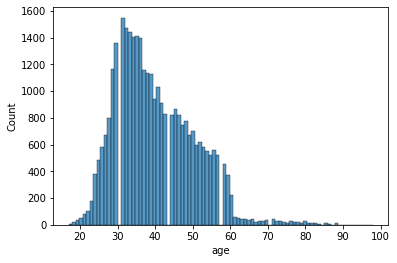

In [ ]:
sns.histplot(train['age']);

In [ ]:
train['age'].quantile([0.0, .5, .90, .95,.99])

0.00    17.00
0.50    38.00
0.90    55.00
0.95    58.00
0.99    70.99
Name: age, dtype: float64

From the above data and histogram , the age distribution looks normal with a long tail. The 99th percentile is just 71 years indicating very few data points with age above 70. Also in the below plot(Age Vs Average subscription),the subscription percentage has clear pattern till 70 years and then saturates at the age of 70. Hence outliers can be capped at 70 years to enable to the model to learn efficiently.

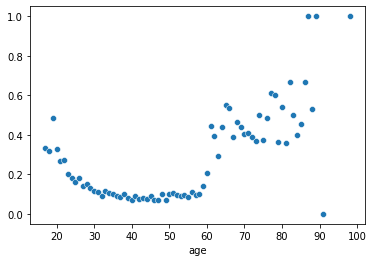

In [ ]:
age_df = train.groupby('age')['y'].mean()
sns.scatterplot(x=age_df.index,y=age_df.values);

The below code caps the age at 70 for the outlier records and replots the relation with the subscription percentage

In [ ]:
train["age"] = np.where(train["age"] > train['age'].quantile(.99), train['age'].quantile(.99), train['age'])

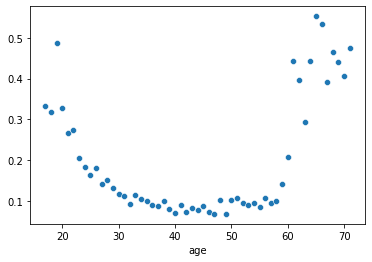

In [ ]:
agg_df = train.groupby('age')['y'].mean()
sns.scatterplot(x=agg_df.index,y=agg_df.values);

### Duration

In [ ]:
train['duration'].describe()

count    32902.000000
mean       258.196523
std        259.089636
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

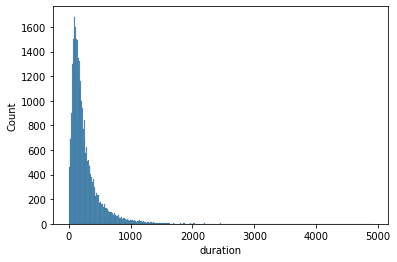

In [ ]:
sns.histplot(train['duration'])

In [ ]:
train['duration'].quantile([0.0, .5, .90, .95,.99])

0.00       0.00
0.50     180.00
0.90     550.00
0.95     750.00
0.99    1259.99
Name: duration, dtype: float64

The duration has very long tail and from the below subscription plot, there is no significant pattern above the 99th percentile(~ 1260). Hence capping the the outlier can be an effective straategy her as well.

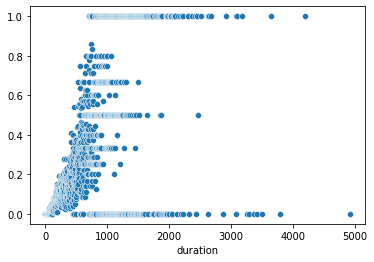

In [ ]:
duration_df = train.groupby('duration')['y'].mean()
sns.scatterplot(x=duration_df.index,y=duration_df.values);

In [ ]:
train["duration"] = np.where(train["duration"] > train['duration'].quantile(.99), train['duration'].quantile(.99), train['duration'])

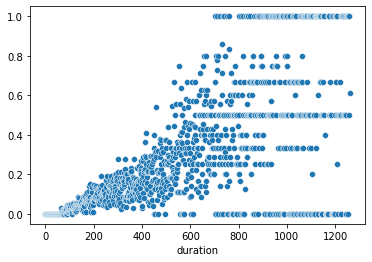

In [ ]:
duration_df = train.groupby('duration')['y'].mean()
sns.scatterplot(x=duration_df.index,y=duration_df.values);

Another striking aspect in the above chart is when the duration is very less( < 50), the subscription is almost nill

### Campaign

In [ ]:
train['campaign'].describe()

count    32902.000000
mean         2.560817
std          2.753590
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

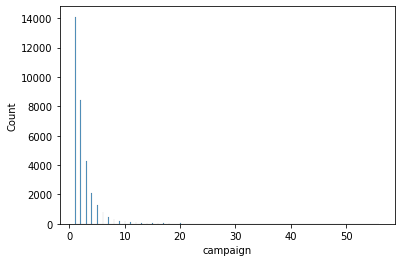

In [ ]:
sns.histplot(train['campaign']);

In [ ]:
train['campaign'].quantile([0.0, .5, .90, .95,.99])

0.00     1.0
0.50     2.0
0.90     5.0
0.95     7.0
0.99    14.0
Name: campaign, dtype: float64

Campaign is another very long-tail distribution and there is absolutely to pattern above the 99th percentile

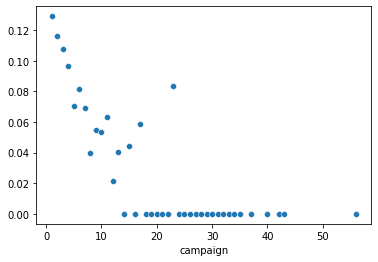

In [ ]:
campaign_df = train.groupby('campaign')['y'].mean()
sns.scatterplot(x=campaign_df.index,y=campaign_df.values);

In [ ]:
train["campaign"] = np.where(train["campaign"] > train['campaign'].quantile(.99), train['campaign'].quantile(.99), train['campaign'])

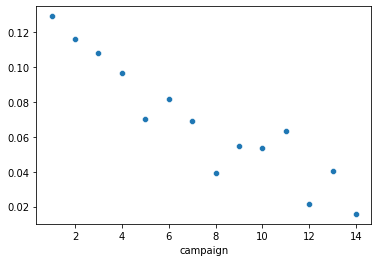

In [ ]:
campaign_df = train.groupby('campaign')['y'].mean()
sns.scatterplot(x=campaign_df.index,y=campaign_df.values);

The pattern looks very clear after capping the outliers

### Previous

In [ ]:
train['previous'].describe()

count    32902.000000
mean         0.174853
std          0.499265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

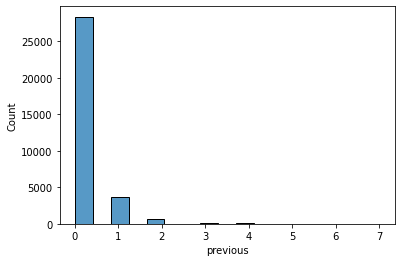

In [ ]:
sns.histplot(train['previous']);

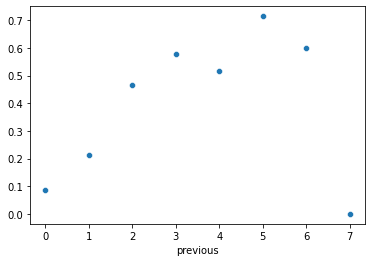

In [ ]:
previous_df = train.groupby('previous')['y'].mean()
sns.scatterplot(x=previous_df.index,y=previous_df.values);

In [ ]:
train['previous'].quantile([0.0, .5, .90, .95,.99])

0.00    0.0
0.50    0.0
0.90    1.0
0.95    1.0
0.99    2.0
Name: previous, dtype: float64

Although the previous also has a long tail, the saturation does not happen at 99th percentile but at 99.5th percentile.

In [ ]:
train['previous'].value_counts()

0    28372
1     3669
2      606
3      175
4       60
5       14
6        5
7        1
Name: previous, dtype: int64

In [ ]:
train['previous'].quantile([0.0, .5, .90, .95,.99,.995])

0.000    0.0
0.500    0.0
0.900    1.0
0.950    1.0
0.990    2.0
0.995    3.0
Name: previous, dtype: float64

In [ ]:
train["previous"] = np.where(train["previous"] > train['previous'].quantile(.995), train['previous'].quantile(.995), train['previous'])

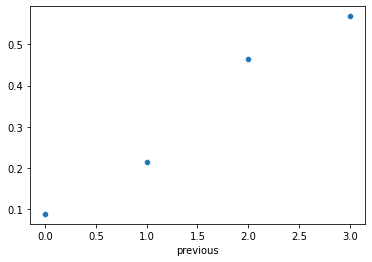

In [ ]:
previous_df = train.groupby('previous')['y'].mean()
sns.scatterplot(x=previous_df.index,y=previous_df.values);

## Categorical Features

The common factor among most of the categorical features is 'unknown' class. However from the below analysis 'unknown' class has a distinct pattern on the subscription percentage hence it is better to retain as is.

In [ ]:
def plot_cat_columns(columnname):
    print(train[columnname].value_counts())
    agg_df = train.groupby(columnname)['y'].mean()
    train[columnname].value_counts().plot(kind='bar');
    plt.show();
    agg_df.plot(kind='bar');
    plt.show();

married     19923
single       9244
divorced     3670
unknown        65
Name: marital, dtype: int64


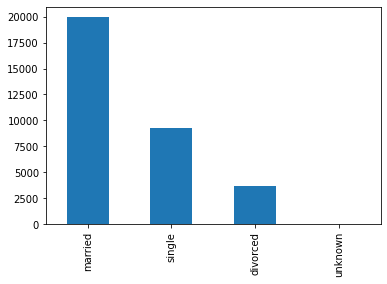

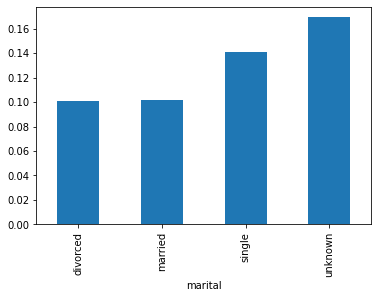

In [ ]:
plot_cat_columns('marital')

admin.           8303
blue-collar      7429
technician       5390
services         3191
management       2343
retired          1362
entrepreneur     1159
self-employed    1098
housemaid         855
unemployed        798
student           710
unknown           264
Name: job, dtype: int64


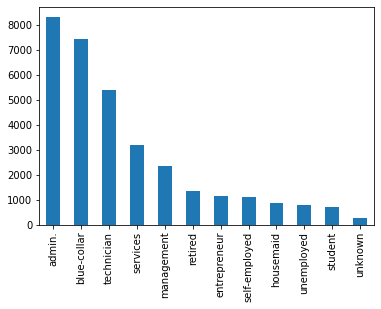

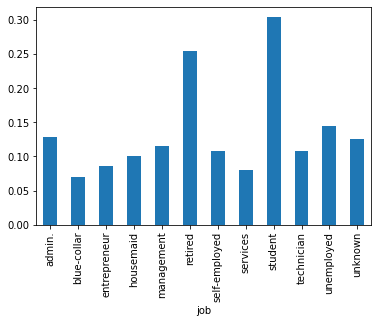

In [ ]:
plot_cat_columns('job')

university.degree      9724
high.school            7583
basic.9y               4818
professional.course    4183
basic.4y               3322
basic.6y               1862
unknown                1394
illiterate               16
Name: education, dtype: int64


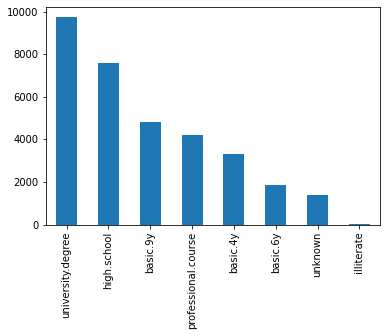

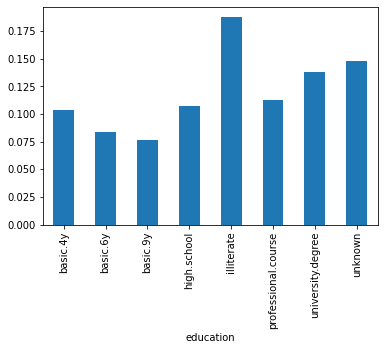

In [ ]:
plot_cat_columns('education')

no         25968
unknown     6931
yes            3
Name: default, dtype: int64


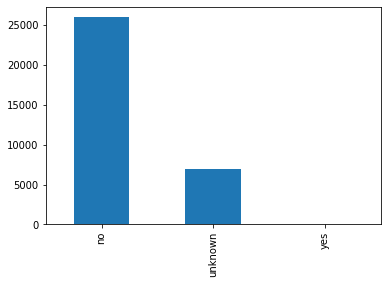

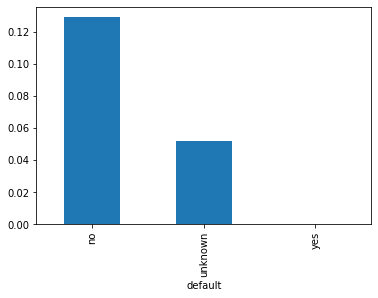

In [ ]:
plot_cat_columns('default')

yes        17233
no         14874
unknown      795
Name: housing, dtype: int64


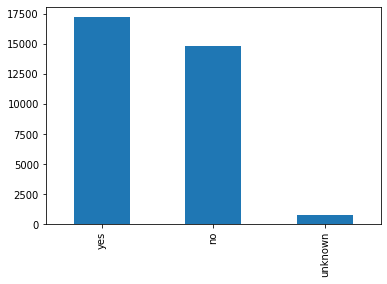

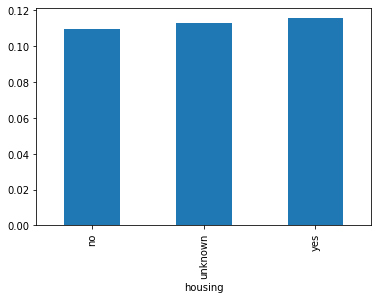

In [ ]:
plot_cat_columns('housing')

no         27091
yes         5016
unknown      795
Name: loan, dtype: int64


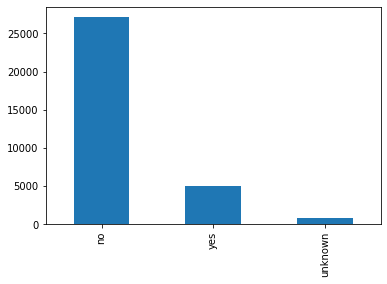

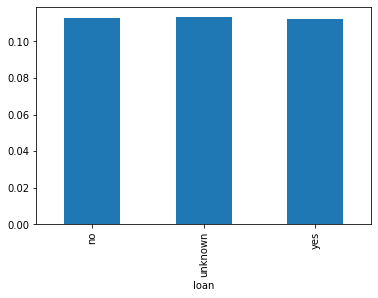

In [ ]:
plot_cat_columns('loan')

cellular     20885
telephone    12017
Name: contact, dtype: int64


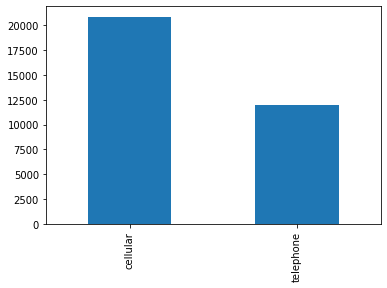

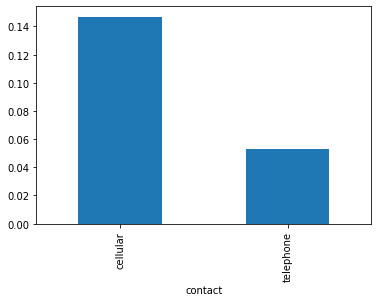

In [ ]:
plot_cat_columns('contact')

may    10991
jul     5751
aug     4944
jun     4242
nov     3262
apr     2083
oct      586
sep      464
mar      436
dec      143
Name: month, dtype: int64


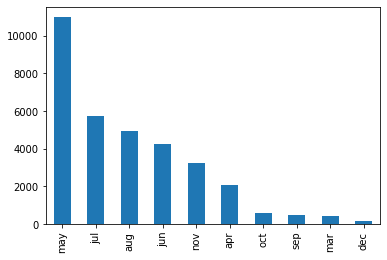

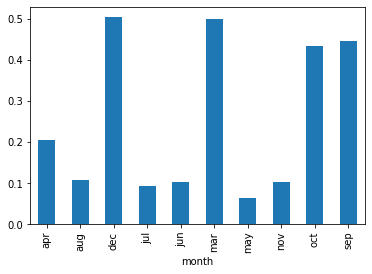

In [ ]:
plot_cat_columns('month')

thu    6846
mon    6801
wed    6508
tue    6436
fri    6311
Name: day_of_week, dtype: int64


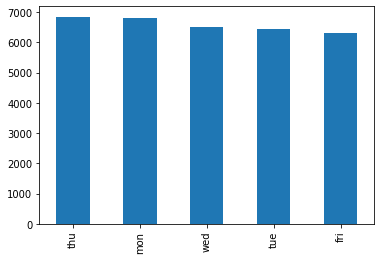

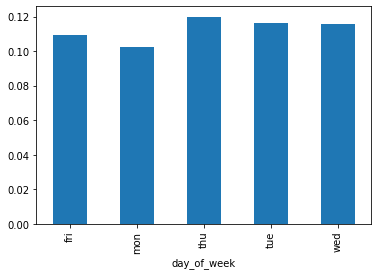

In [ ]:
plot_cat_columns('day_of_week')

nonexistent    28372
failure         3426
success         1104
Name: poutcome, dtype: int64


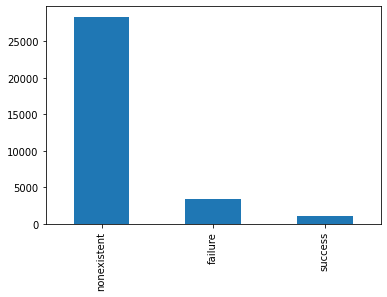

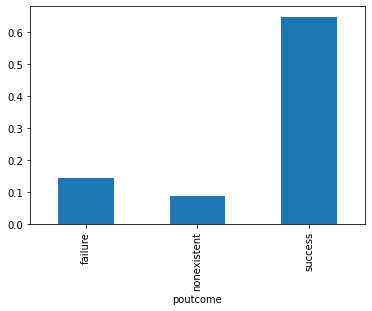

In [ ]:
plot_cat_columns('poutcome')

## Data Transformation code excluding EDA

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Read Input File
train = pd.read_excel('https://github.com/rsdevanathan/Customer_Subscription/blob/main/train_file.xlsx?raw=true')

# Remove Duplicates
train = train.drop_duplicates()

#Encode Target Variable
train = train.replace({'y': {'yes': 1, 
                                'no': 0}})
# Remove Numeric Features outliers based on the EDA
train["age"] = np.where(train["age"] > 71, 71, train['age'])
train["duration"] = np.where(train["duration"] > 1260, 1260, train['duration'])
train["campaign"] = np.where(train["campaign"] > 14, 14, train['campaign'])
train["previous"] = np.where(train["previous"] > 3, 3, train['previous'])

# Column Transformers
# Scaling for Numeric Columns
# One Hot Encoding for Categoriccal Features
numerical_features = ['age','duration', 'campaign', 'previous']
categorical_features = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
feature_transformer = make_column_transformer((StandardScaler(), numerical_features), (OneHotEncoder(), categorical_features),remainder='passthrough')
feature_array = feature_transformer.fit_transform(train)
feature_cols = list(feature_transformer.get_feature_names_out())
feature_cols = [col.replace('standardscaler__', '').replace('onehotencoder__', '').replace('remainder__', '') for col in feature_cols]
feature_data = pd.DataFrame.sparse.from_spmatrix(feature_array,columns=feature_cols)
# Save Feature Data
feature_data.to_csv('feature_data.csv')

End